In [9]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sn

In [30]:
agestruct = pd.read_csv('./data/Altersstruktur_BW.csv',
                        sep=';',
                        comment='#')

In [31]:
agestruct

,Im_Alter_von,2005_n,2005_perc,2010_n,2010_perc,2015_n,2015_perc,2019_n,2019_perc
0,unter 1 Jahr,94424,0.9,90868,0.8,101417,0.9,108303,1.0
1,1 Jahr,97531,0.9,90592,0.8,99912,0.9,110182,1.0
2,2 Jahren,98547,0.9,93067,0.9,96971,0.9,110107,1.0
3,3 Jahren,100761,0.9,94108,0.9,95706,0.9,109920,1.0
4,4 Jahren,103275,1.0,93277,0.9,94410,0.9,106552,1.0
...,...,...,...,...,...,...,...,...,...
87,87 Jahren,17098,0.2,33601,0.3,38092,0.4,37817,0.3
88,88 Jahren,13855,0.1,29995,0.3,31494,0.3,33961,0.3
89,89 Jahren,13177,0.1,27181,0.3,27306,0.3,30738,0.3
90,90 und mehr Jahren,79238,0.7,81696,0.8,91908,0.8,105482,1.0


In [32]:
agestruct.iloc[91]

Im_Alter_von    Insgesamt 
2005_n            10735701
2005_perc            100.0
2010_n            10753880
2010_perc            100.0
2015_n            10879618
2015_perc            100.0
2019_n            11100394
2019_perc            100.0
Name: 91, dtype: object

In [33]:
agestruct.keys()

Index(['Im_Alter_von', '2005_n', '2005_perc', '2010_n', '2010_perc', '2015_n',
       '2015_perc', '2019_n', '2019_perc'],
      dtype='object')

In [40]:
agestruct["2019_n"].iloc[:-1].sum()

11100394

In [39]:
agestruct["2019_n"].iloc[-1]

11100394

In [42]:
agestruct[['Im_Alter_von',"2019_n"]].iloc[:-1]

,Im_Alter_von,2019_n
0,unter 1 Jahr,108303
1,1 Jahr,110182
2,2 Jahren,110107
3,3 Jahren,109920
4,4 Jahren,106552
...,...,...
86,86 Jahren,42589
87,87 Jahren,37817
88,88 Jahren,33961
89,89 Jahren,30738


In [47]:
age2 = agestruct.iloc[:-1]

<AxesSubplot:xlabel='Im_Alter_von', ylabel='2019_n'>

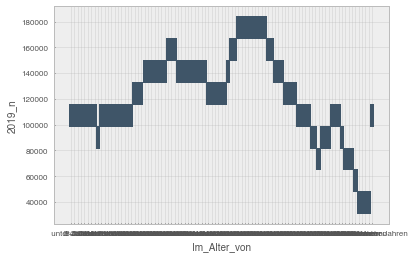

In [54]:
sn.histplot(age2, y="2019_n", x="Im_Alter_von")

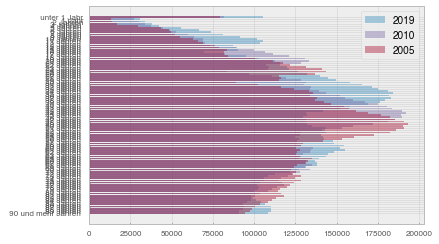

In [62]:
plt.barh(age2["Im_Alter_von"][::-1], age2["2019_n"], alpha=0.4, label="2019")
plt.barh(age2["Im_Alter_von"][::-1], age2["2010_n"], alpha=0.4, label="2010")
plt.barh(age2["Im_Alter_von"][::-1], age2["2005_n"], alpha=0.4, label="2005")
plt.legend(loc='best')

In [63]:
age_groups = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90"]

In [67]:
age2["Im_Alter_von"].iloc[:10]

0     unter 1 Jahr
1           1 Jahr
2         2 Jahren
3        3 Jahren 
4        4 Jahren 
5        5 Jahren 
6        6 Jahren 
7        7 Jahren 
8        8 Jahren 
9        9 Jahren 
Name: Im_Alter_von, dtype: object

In [68]:
age2["Im_Alter_von"].iloc[10:20]

10     10 Jahren 
11     11 Jahren 
12     12 Jahren 
13     13 Jahren 
14     14 Jahren 
15     15 Jahren 
16     16 Jahren 
17     17 Jahren 
18     18 Jahren 
19     19 Jahren 
Name: Im_Alter_von, dtype: object

In [69]:
age2["Im_Alter_von"].iloc[20:30]

20     20 Jahren 
21     21 Jahren 
22     22 Jahren 
23     23 Jahren 
24     24 Jahren 
25     25 Jahren 
26     26 Jahren 
27     27 Jahren 
28     28 Jahren 
29     29 Jahren 
Name: Im_Alter_von, dtype: object

In [71]:
age2["2019_n"]

0     108303
1     110182
2     110107
3     109920
4     106552
       ...  
86     42589
87     37817
88     33961
89     30738
90    105482
Name: 2019_n, Length: 91, dtype: int64

In [75]:
age2["2019_n"].shape

(91,)

In [98]:
x=10
snapshots = ["2005_n", "2010_n", "2019_n"]
grouped_age_dist = np.empty(shape=(len(snapshots),x))

for cur_ix, cur_key in enumerate(snapshots):
    a = age2[cur_key].iloc[:90].to_numpy()
    tmp = a.reshape((int(a.shape[0]/x), int(x) )).sum(1)
    print(tmp.shape)
    grouped_age_dist[cur_ix,:-1] = tmp
    grouped_age_dist[cur_ix,-1] = age2[cur_key].iloc[90:]

(9,)
(9,)
(9,)


In [99]:
grouped_age_dist

array([[1061236., 1226736., 1278811., 1570701., 1762800., 1309484.,
        1227412.,  833923.,  385360.,   79238.],
       [ 957469., 1170824., 1315806., 1317926., 1822800., 1490872.,
        1123298., 1005703.,  467486.,   81696.],
       [1048157., 1065141., 1402914., 1457922., 1375192., 1766660.,
        1324530.,  939740.,  614656.,  105482.]])

In [88]:
age2["2019_n"].iloc[90:]

90    105482
Name: 2019_n, dtype: int64

In [85]:
age2["Im_Alter_von"].iloc[90:]

90     90 und mehr Jahren 
Name: Im_Alter_von, dtype: object

In [107]:
grouped_age_distributions = pd.DataFrame(grouped_age_dist.T, 
                                         columns=snapshots,
                                        index=age_groups)

In [108]:
grouped_age_distributions

,2005_n,2010_n,2019_n
0-9,1061236.0,957469.0,1048157.0
10-19,1226736.0,1170824.0,1065141.0
20-29,1278811.0,1315806.0,1402914.0
30-39,1570701.0,1317926.0,1457922.0
40-49,1762800.0,1822800.0,1375192.0
50-59,1309484.0,1490872.0,1766660.0
60-69,1227412.0,1123298.0,1324530.0
70-79,833923.0,1005703.0,939740.0
80-89,385360.0,467486.0,614656.0
90,79238.0,81696.0,105482.0


In [113]:
grouped_age_distributions.index

Index(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79',
       '80-89', '90'],
      dtype='object')

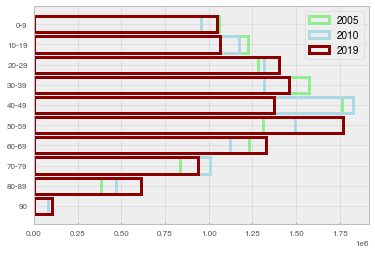

In [133]:
plt.barh(grouped_age_distributions.index[::-1], grouped_age_distributions["2005_n"][::-1], color='None', lw=3, edgecolor='lightgreen', label="2005")

plt.barh(grouped_age_distributions.index[::-1], grouped_age_distributions["2010_n"][::-1], color='None',  lw=3, edgecolor='lightblue', label="2010")
plt.barh(grouped_age_distributions.index[::-1], grouped_age_distributions["2019_n"][::-1], color='None',   lw=3, edgecolor='darkred', label="2019")
plt.legend(loc='best')

In [134]:
grouped_age_distributions

,2005_n,2010_n,2019_n
0-9,1061236.0,957469.0,1048157.0
10-19,1226736.0,1170824.0,1065141.0
20-29,1278811.0,1315806.0,1402914.0
30-39,1570701.0,1317926.0,1457922.0
40-49,1762800.0,1822800.0,1375192.0
50-59,1309484.0,1490872.0,1766660.0
60-69,1227412.0,1123298.0,1324530.0
70-79,833923.0,1005703.0,939740.0
80-89,385360.0,467486.0,614656.0
90,79238.0,81696.0,105482.0


In [135]:
grouped_age_distributions.sum()

2005_n    10735701.0
2010_n    10753880.0
2019_n    11100394.0
dtype: float64

In [137]:
grouped_age_distributions.to_csv('./data/grouped_age_distributions_bw.csv')

In [139]:
grouped_age_distributions["2019_n"]/11100394.0

0-9      0.094425
10-19    0.095955
20-29    0.126384
30-39    0.131340
40-49    0.123887
50-59    0.159153
60-69    0.119323
70-79    0.084658
80-89    0.055372
90       0.009503
Name: 2019_n, dtype: float64